<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons # creara nuestro dataframe con data points y formas de lunas
from sklearn.cluster import DBSCAN  # librería para hacer el DBSCAN
from sklearn.metrics import silhouette_score  # para medir el coeficiente del modelo con DBSCAN

## Preparando datos de prueba

In [3]:
# Creamos nuestro df de dos dimensiones, pero sin columna de cluster
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True )

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

In [4]:
# Creamos df con forma de luna
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
)

## Visualización de datos

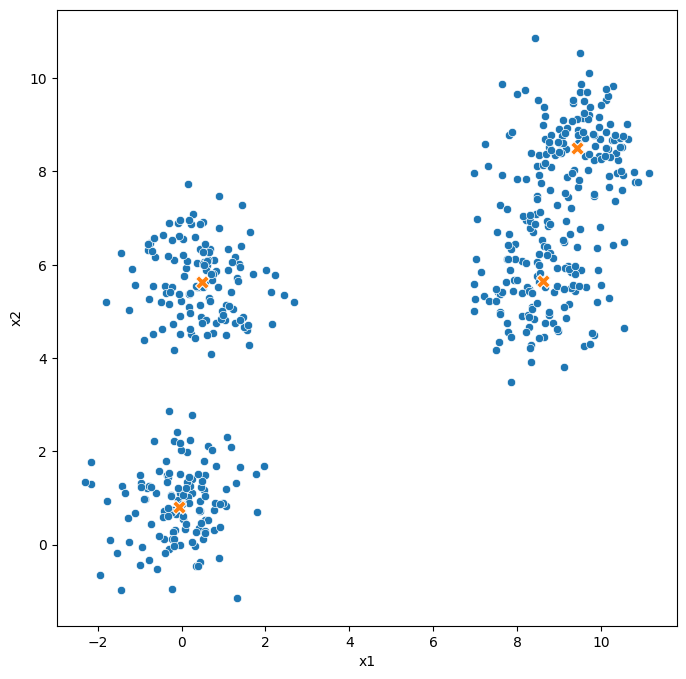

In [5]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.plot()
plt.show()

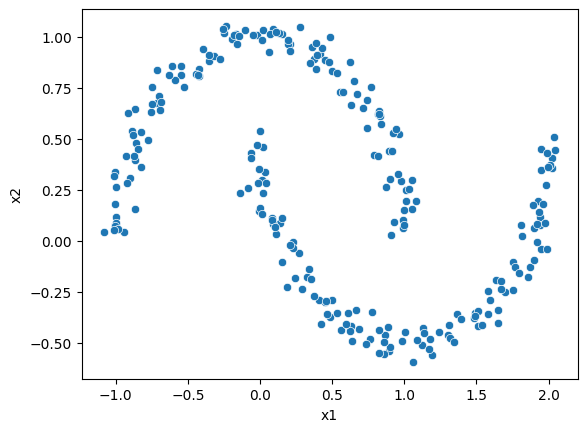

In [6]:
# Visualizamos las lunas que queremos graficar
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

## Implementando DBSCAN

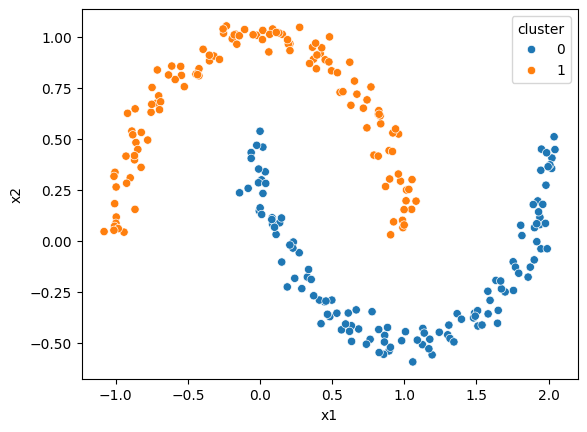

In [7]:
# definimos objeto que tendrá la función DBSCAN
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)   # procedemos con la predicción de data points formas de lunas
df_moons['cluster'] = y_m_predict   # le agregamos un campo o columna a df_moons con los valores de la predicción
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

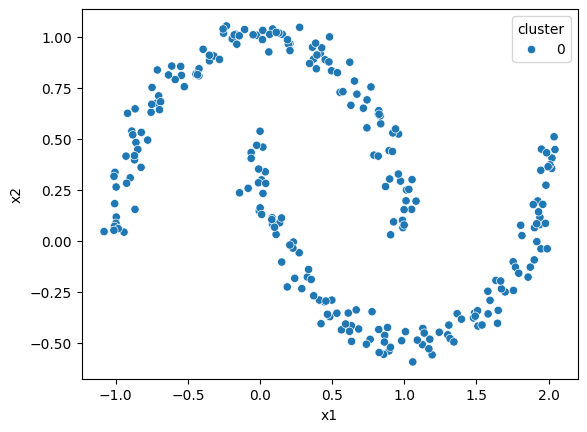

In [8]:
# definimos objeto que tendrá la función DBSCAN
dbscan_cluster = DBSCAN(eps=10, min_samples=15)
y_m_predict = dbscan_cluster.fit_predict(X_m)   # procedemos con la predicción de data points formas de lunas
df_moons['cluster'] = y_m_predict   # le agregamos un campo o columna a df_moons con los valores de la predicción
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

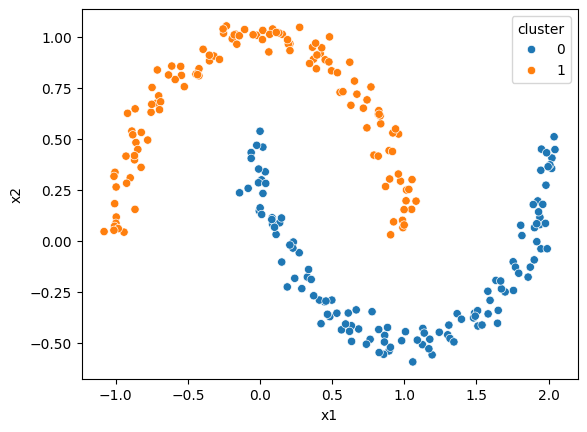

In [9]:
# definimos objeto que tendrá la función DBSCAN
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)   # procedemos con la predicción de data points formas de lunas
df_moons['cluster'] = y_m_predict   # le agregamos un campo o columna a df_moons con los valores de la predicción
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

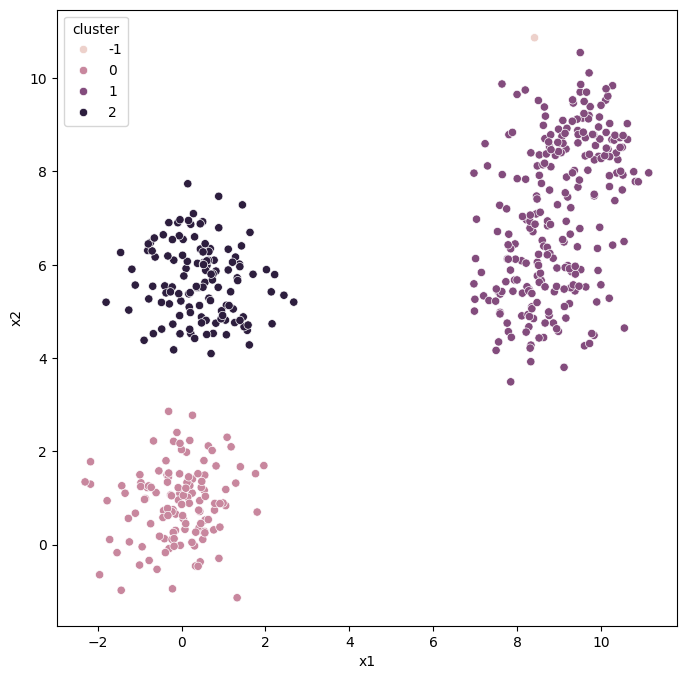

In [10]:
# Ahora resolveremos el problema con nuestro df de X

dbscan = DBSCAN(eps=1, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

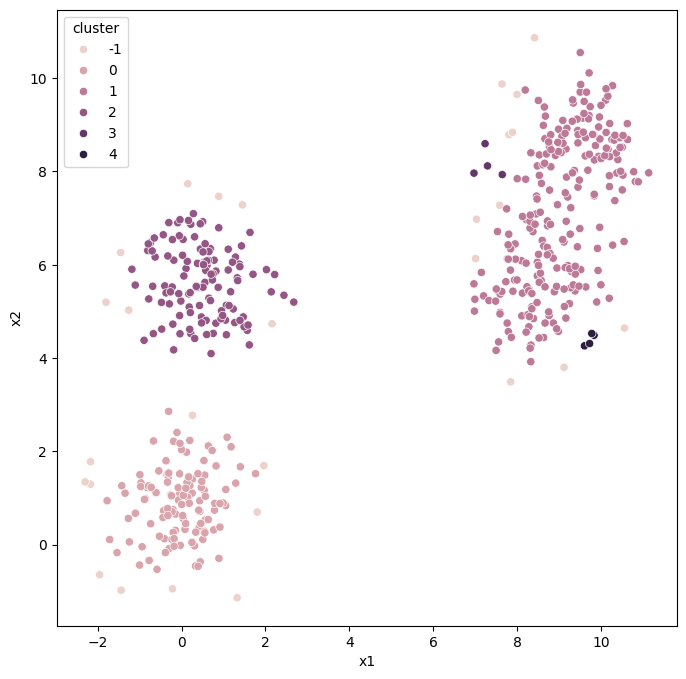

In [11]:
# Ahora resolveremos el problema con nuestro df de X
# Pero con eps=0.5

dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

# Hyperparameters
## Vamos a encontrar los mejores parámetros

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
neighbors = NearestNeighbors(n_neighbors=3) # definimos objeto con función NearestNeighbors, con parámetro n_neighbors, diciéndole con cuantos vecinos mediremos la distancia
# Una regla para definir el número n_neighbors es multibipliar por 2 las dimensiones del data frame X 2x2 = 4, se escoge 3

neighbors_fit = neighbors.fit(X) # entrenamos el df X a través del objeto que tiene NearesNeighbors y guardadmos en variable
distances, indices = neighbors_fit.kneighbors(X) #Ahora obtenenmos las distancias y los índices de los 3 nearestneighbors = vecinos más cercanos y sus distancias.

In [14]:
distances

array([[0.        , 0.09376764, 0.13288936],
       [0.        , 0.12664152, 0.24115862],
       [0.        , 0.10689177, 0.24170383],
       ...,
       [0.        , 0.24836061, 0.25056892],
       [0.        , 0.10187916, 0.12696044],
       [0.        , 0.18233826, 0.20683392]])

In [15]:
distances.shape

(500, 3)

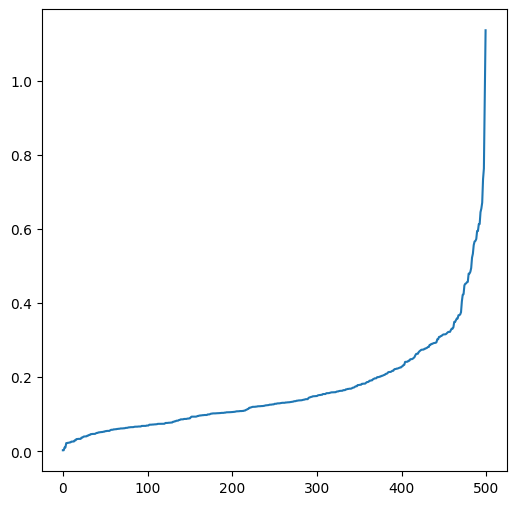

In [16]:
distances = np.sort(distances, axis=0)  # ordenamos distances por filas, de manera ascendente
distances = distances[:,1] # obtenemos las distancias de la primera columna, es decir de los más cercano

fig = plt.figure(figsize=(6,6))
plt.plot(distances)

# la grafica resultante tiene forma de rodilla y se tienen en cuenta los valores en la rodilla
# estos son los valores que vamos a iterar para nuestro epsilon (radio)
# para obtener un promedio o una gráfica aproximada de las distancias que tienen todos los puntos entre sí de sus vecino más cercanos
# porque con esto tendremos una idea de cual es ese epsilon que deberíamos configurar
# teniendo esto claro vamos a pasar a iterar sobre el epsilon y el  mínimo de vecinos válidos para el DBSCAN

In [17]:
# teniendo esto claro vamos a pasar a iterar sobre el epsilon y el  mínimo de vecinos válidos para el DBSCAN
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2, 10)

In [18]:
print(eps_values)
print(min_samples)

[0.25 0.35 0.45 0.55 0.65 0.75]
[2 3 4 5 6 7 8 9]


In [19]:
# Necesitamos volver eps_values y min_samples en una matriz
from itertools import product

In [20]:
print(list(product(eps_values, min_samples)))
dbscan_params = list(product(eps_values, min_samples))

[(0.25, 2), (0.25, 3), (0.25, 4), (0.25, 5), (0.25, 6), (0.25, 7), (0.25, 8), (0.25, 9), (0.35, 2), (0.35, 3), (0.35, 4), (0.35, 5), (0.35, 6), (0.35, 7), (0.35, 8), (0.35, 9), (0.44999999999999996, 2), (0.44999999999999996, 3), (0.44999999999999996, 4), (0.44999999999999996, 5), (0.44999999999999996, 6), (0.44999999999999996, 7), (0.44999999999999996, 8), (0.44999999999999996, 9), (0.5499999999999999, 2), (0.5499999999999999, 3), (0.5499999999999999, 4), (0.5499999999999999, 5), (0.5499999999999999, 6), (0.5499999999999999, 7), (0.5499999999999999, 8), (0.5499999999999999, 9), (0.6499999999999999, 2), (0.6499999999999999, 3), (0.6499999999999999, 4), (0.6499999999999999, 5), (0.6499999999999999, 6), (0.6499999999999999, 7), (0.6499999999999999, 8), (0.6499999999999999, 9), (0.7499999999999999, 2), (0.7499999999999999, 3), (0.7499999999999999, 4), (0.7499999999999999, 5), (0.7499999999999999, 6), (0.7499999999999999, 7), (0.7499999999999999, 8), (0.7499999999999999, 9)]


In [21]:
sil_scores = []

for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
  sil_scores.append(silhouette_score(X, y_pred))

In [22]:
sil_scores

[-0.03653012299805663,
 -0.08805390558585159,
 -0.11968670449256283,
 -0.1416266159079887,
 -0.23245969059133903,
 -0.38894258220324585,
 -0.5102479466847695,
 -0.5539798257100961,
 -0.1951757488858595,
 0.07258312595303135,
 -0.0329196282475593,
 0.005633439487641498,
 0.03270096477268507,
 -0.04834257503446521,
 -0.06001313712901568,
 -0.1281887595929257,
 0.044682075618307435,
 0.25766531988302455,
 0.33901976973894826,
 0.5434572493959686,
 0.5350998828899903,
 0.5238825107659666,
 0.48858890536448973,
 0.4703543367248492,
 0.24281666989875514,
 0.40531427626799926,
 0.2910606989208454,
 0.6001078194536311,
 0.5923617544957621,
 0.5694803017928073,
 0.5571649864477108,
 0.5501087631288104,
 0.42724485738786017,
 0.42724485738786017,
 0.42000126532751164,
 0.6247373471697666,
 0.6167841786856018,
 0.6126655106809142,
 0.6091905420699614,
 0.6020088861071572,
 0.6994082741796951,
 0.6994082741796951,
 0.6994082741796951,
 0.4052393459598036,
 0.697017771982063,
 0.6809559287041852,
 

In [23]:
# Ahora graficamos

df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns = ['Eps', 'Min_Samples']) # con pandas volvemos a dataframe
df_params_tunning['sil_scores'] = sil_scores

In [24]:
pivot_data = pd.pivot_table(df_params_tunning, values='sil_scores', index='Min_Samples', columns='Eps')

In [25]:
pivot_data

Eps,0.25,0.35,0.45,0.55,0.65,0.75
Min_Samples,,,,,,
2,-0.036530,-0.195176,0.044682,0.242817,0.427245,0.699408
3,-0.088054,0.072583,0.257665,0.405314,0.427245,0.699408
4,-0.119687,-0.032920,0.339020,0.291061,0.420001,0.699408
5,-0.141627,0.005633,0.543457,0.600108,0.624737,0.405239
6,-0.232460,0.032701,0.535100,0.592362,0.616784,0.697018
7,-0.388943,-0.048343,0.523883,0.569480,0.612666,0.680956
8,-0.510248,-0.060013,0.488589,0.557165,0.609191,0.648286
9,-0.553980,-0.128189,0.470354,0.550109,0.602009,0.655254


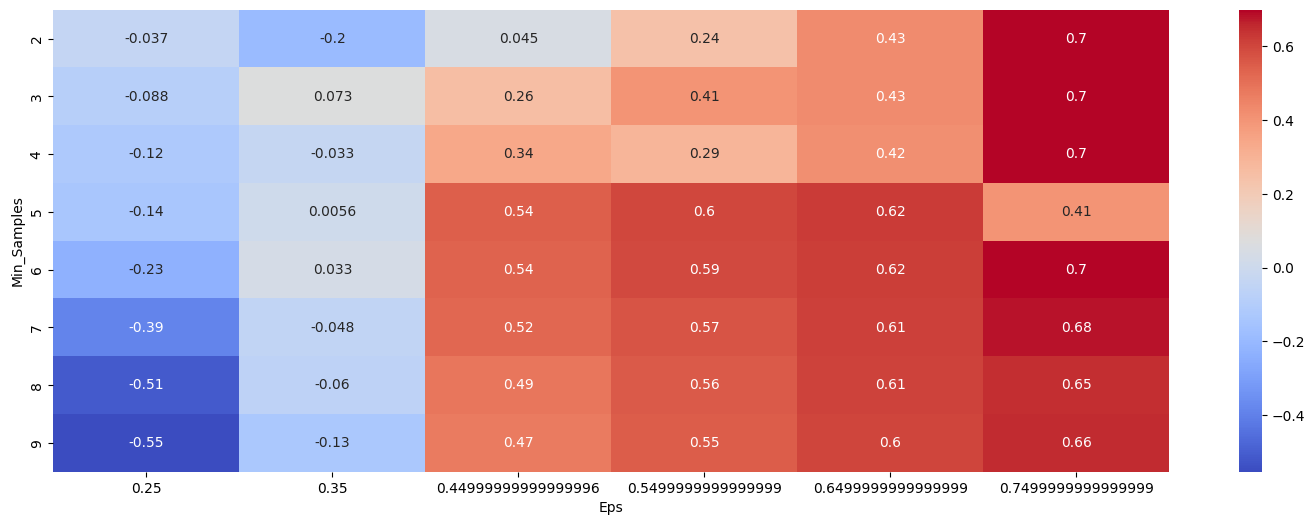

In [28]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

#La gráfica arroja que los puntos más rojos tienen mejor índice o coeficiente de silueta

## Evaluación de DBSCAN

In [29]:
# Ejecutamos DBSCAN nuevamente pero utilizando hiperparámetros hallados eps y min_samples

# definimos objeto con función DBSCAN
dbscan_cluster = DBSCAN(eps=0.75, min_samples=6)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

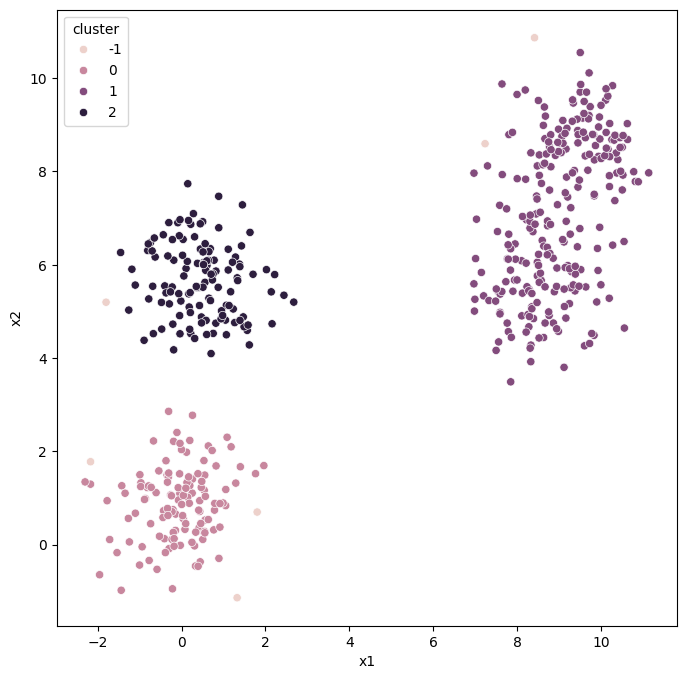

In [32]:
#  graficamos resultados
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

For n_clusters = 4 The average silhouette_score is : 0.697017771982063


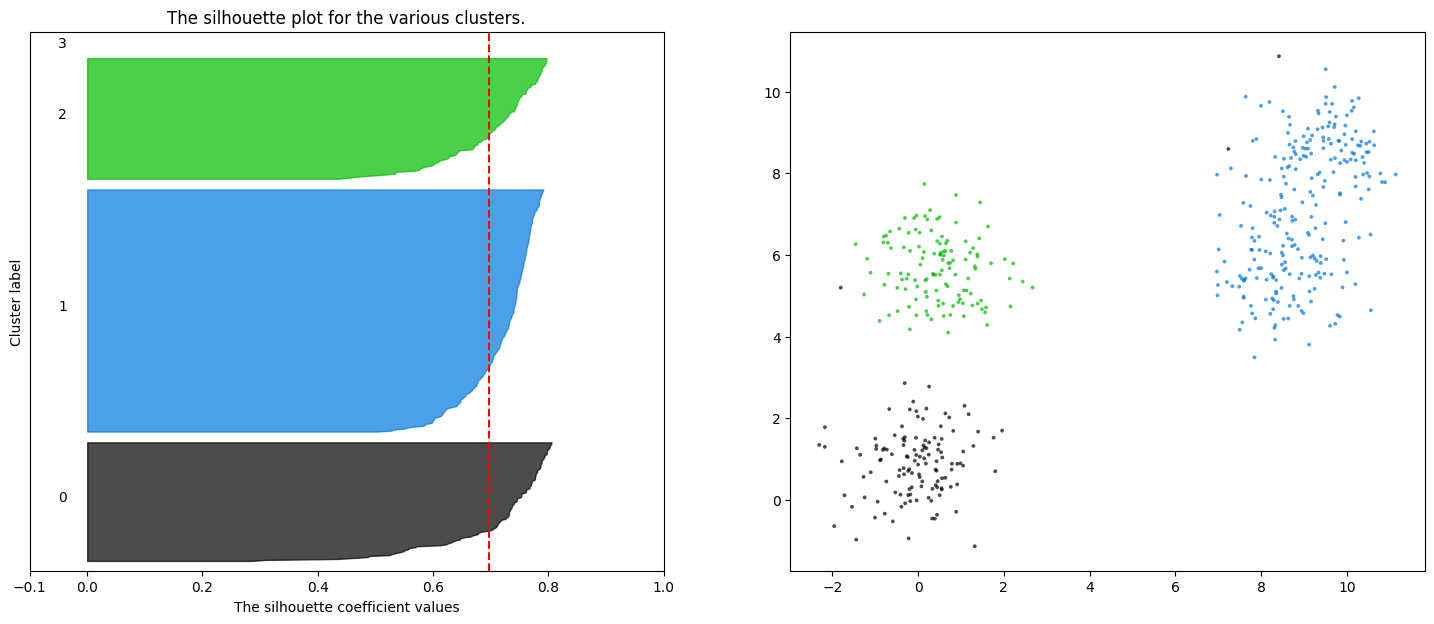

In [33]:
# Hallaremos índice de silueta mediante código de página
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
clusterer = DBSCAN(eps=0.75, min_samples=6)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()